MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In [1]:
# Imports for data loading and array math
import numpy as np
import pandas as pd

# Imports for visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

# Imports for dimensionality reduction
from sklearn.manifold import MDS, TSNE

# Import for data split
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')



test = pd.read_csv('test.csv')
#test = test.values.reshape((test.shape[0], 28, 28))/255.


There are 3 files in the 'digit-recognizer' directory:
* sample_submission.csv - contains sample submission for the competition 
* train.csv - contains train data
* test.csv - contains test data

Train data table consist of 785 columns: 784 columns for each pixel of the image and 1 column for the target. Test data table has 784 columns and don't have target. Each pixel is the number in range [0; 255] inlcusive. 

# Exploratory Data Analysis 

In [3]:
train.shape,test.shape

((42000, 785), (28000, 784))

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
type(train),type(test)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [7]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [8]:
test.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


In [9]:
print(train.columns)
print(test.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)
Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)


In [10]:
label=sorted(train.iloc[:,0])

In [11]:
label = list(np.sort(train['label'].unique()))
print(label)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


C:\Users\Avik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

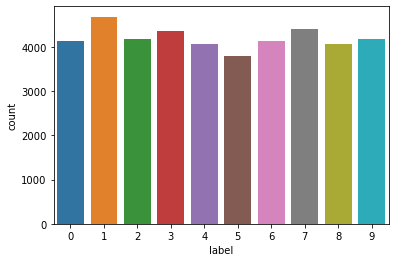

In [12]:
sns.countplot(train["label"])

C:\Users\Avik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

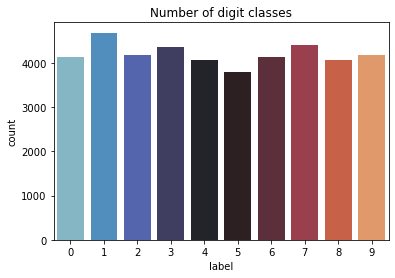

In [13]:
## Visualizing the number of class and counts in the datasets
#plt.plot(figure = (1,1))
g = sns.countplot( train["label"], palette = 'icefire')
plt.title('Number of digit classes')
train.label.astype('category').value_counts()

In [14]:
X = train.iloc[:, 1:].values #removing 'label' column
#X = X.reshape((X.shape[0], 28, 28))/255.#Since 0-255 is the maximum value, dividing by 255 expresses a 0-1 representation. 
#Each channel (Red, Green, and Blue) is 8 bits, so they are each limited to 256, in this case 255 since 0 is included.

Y = train.iloc[:, 0].values #'labels column'

test=test.iloc[:,:].values

In [15]:
#for visualising the pictures
def drawImg(sample):
    img=sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()

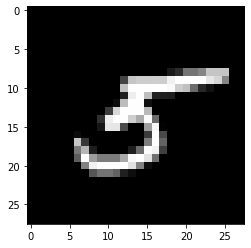

5

In [18]:
drawImg(X[80])
Y[80]

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((33600, 784), (33600,), (8400, 784), (8400,))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#total_sd_76=len(x_test)
ac_score = []
for k in range(1,10):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    knn_predict=knn.predict(x_test)
    accuracy = accuracy_score(knn_predict, y_test)
    ac_score.append(accuracy)
    print("Accuracy: ",accuracy,"for k= ",k)
    print("Confusion Matrix:\n", confusion_matrix(knn_predict,y_test))
    print("\n---------------\n")
    #errors=(np.array(heart_target_test_sd_76)^predict_vals_sd_76).sum()
    #print('For k=',k,'success rate=',round((total_sd_76-errors)*100/total_sd_76,2),"%")

Accuracy:  0.9669047619047619 for k=  1
Confusion Matrix:
 [[849   0   4   0   0   1   4   0   2   3]
 [  0 936   3   1   3   1   0   5  13   1]
 [  1   2 804  10   0   1   0   4   1   0]
 [  0   1   3 831   0  14   0   0  11   4]
 [  0   0   2   0 802   1   1   2   3  16]
 [  1   0   0  16   0 700   6   0  13   1]
 [  2   0   1   0   0   8 789   0   5   0]
 [  0   1  14   5   1   0   0 826   4  14]
 [  0   0   4   7   0   1   0   0 782   1]
 [  0   0   0   3  23   4   0  13  12 803]]

---------------



In [ ]:
ac_score

In [ ]:
plt.plot(range(1,10), ac_score)
plt.title('Determining the Optimal Number of Neighbors')
plt.xlabel('K - Number of Neighbors')
plt.ylabel('Accuracy_score')
plt.show()

In [ ]:
scr_list=[]
for k in range(1,10):
    
    score=cross_val_score(knn,X,Y,cv=10) #ten fold cross validation
    scr_list.append(score.mean())

In [ ]:
scr_list

In [ ]:
plt.plot(range(1,10), scr_list)
plt.title('Determining the Optimal Number of Neighbors')
plt.xlabel('K - Number of Neighbors')
plt.ylabel('cv_score')
plt.show()

In [ ]:
#from sklearn.model_selection import cross_val_score
 #ten fold cross validation
    #model with k=3 is giving highest accuracy
neigh=KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)
score=cross_val_score(neigh,X,Y,cv=10)

In [ ]:
score 
score.mean()#cross validation score

In [ ]:
confusion_matrix(knn_predict,y_test)

In [ ]:
from sklearn.metrics import classification_report
classification_report(knn_predict, y_test)

In [ ]:
knn_predict_final=neigh.predict(test)

In [ ]:
knn_predict_final

In [ ]:
drawImg(test[-1])

In [ ]:
import numpy as np
import pandas as pd

# Imports for visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

# Imports for dimensionality reduction
from sklearn.manifold import MDS, TSNE

# Import for data split
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv('../input/mnist-dataset-for-digit-recognition/train.csv')

X = train.iloc[:, 1:].values #removing 'label' column
#X = X.reshape((X.shape[0], 28, 28))/255.#Since 0-255 is the maximum value, dividing by 255 expresses a 0-1 representation. 
#Each channel (Red, Green, and Blue) is 8 bits, so they are each limited to 256, in this case 255 since 0 is included.
X_N=X


test = pd.read_csv('../input/mnist-dataset-for-digit-recognition/test.csv')
#test = test.values.reshape((test.shape[0], 28, 28))/255.
#

In [ ]:
print(train.describe())


In [ ]:
print(test.describe())

In [ ]:
train.info()

In [ ]:
Y = train.iloc[:, 0].values #'labels column'
list(Y)

In [ ]:
#normalization
#
print("X:", X.shape)
print("test:", test.shape)

In [ ]:
#Normalized Images help the learning algorithm to converge faster
#Without standardization, the raw pixel values when fed into the network slows down the learning due to the erratic input nature.
mean_px = X.mean().astype(np.float32)
std_px = X.std().astype(np.float32)
X = (X - mean_px)/(std_px)

In [ ]:
mean_px = X.mean()
std_px = X.std()
X_N = (X - mean_px)/(std_px)
X_N

In [ ]:
drawImg(X[101]),drawImg(X_N[101])

In [ ]:
x_n_train,x_n_test,y_n_train,y_n_test=train_test_split(X_N,Y,train_size=0.8,random_state=1)

type(x_n_train),type(x_n_test),type(y_n_train),type(y_n_test)


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8,random_state=1)

type(x_train),type(x_test),type(y_train),type(y_test)

In [ ]:
model_linear = SVC(kernel='linear')
model_linear.fit(x_n_train,y_n_train)

x_n_pred = model_linear.predict(x_n_test)

In [ ]:
x_n_pred

In [ ]:
model_linear = SVC(kernel='linear')
model_linear.fit(x_train,y_train)

x_pred = model_linear.predict(x_test)
x_pred

In [ ]:
x_pred

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
confusion_matrix(x_n_pred,y_n_test),accuracy_score(x_n_pred,y_n_test)